# Automobile Dataset

In [50]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from typing import List


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/automobile.dat', header=None, comment='@', sep=',')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,168,toyota,gas,std,two,sedan,rwd,front,94.5,168.7,...,2bbl,3.19,3.03,9.0,70,4800,29,34,8058,1
1,113,mazda,gas,std,four,sedan,fwd,front,93.1,166.8,...,2bbl,3.08,3.15,9.0,68,5000,31,38,7395,1
2,87,toyota,gas,std,two,hatchback,fwd,front,95.7,158.7,...,2bbl,3.05,3.03,9.0,62,4800,35,39,5348,1
3,125,mitsubishi,gas,std,four,sedan,fwd,front,96.3,172.4,...,2bbl,3.35,3.46,8.5,88,5000,25,32,6989,1
4,148,dodge,gas,turbo,?,sedan,fwd,front,93.7,157.3,...,mpfi,3.03,3.39,7.6,102,5500,24,30,8558,1


In [3]:
headers = [
    'norm-losses',
    'make',
    'fuel_type',
    'aspiration',
    'num_doors',
    'body_style',
    'drive_wheels',
    'engine_location',
    'wheel_base',
    'length',
    'width',
    'height',
    'curb_weight',
    'engine_type',
    'num_cylinders',
    'engine_size',
    'fuel_system',
    'bore',
    'stroke',
    'compression_ratio',
    'horsepower',
    'peak_rpm',
    'city_mpg',
    'highway_mpg',
    'price',
    'symboling'
    ]
df.columns = headers
df.head()

,norm-losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,symboling
0,168,toyota,gas,std,two,sedan,rwd,front,94.5,168.7,...,2bbl,3.19,3.03,9.0,70,4800,29,34,8058,1
1,113,mazda,gas,std,four,sedan,fwd,front,93.1,166.8,...,2bbl,3.08,3.15,9.0,68,5000,31,38,7395,1
2,87,toyota,gas,std,two,hatchback,fwd,front,95.7,158.7,...,2bbl,3.05,3.03,9.0,62,4800,35,39,5348,1
3,125,mitsubishi,gas,std,four,sedan,fwd,front,96.3,172.4,...,2bbl,3.35,3.46,8.5,88,5000,25,32,6989,1
4,148,dodge,gas,turbo,?,sedan,fwd,front,93.7,157.3,...,mpfi,3.03,3.39,7.6,102,5500,24,30,8558,1


## 1. Exploratory Data Analysis

### General Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   norm-losses        205 non-null    object 
 1   make               205 non-null    object 
 2   fuel_type          205 non-null    object 
 3   aspiration         205 non-null    object 
 4   num_doors          205 non-null    object 
 5   body_style         205 non-null    object 
 6   drive_wheels       205 non-null    object 
 7   engine_location    205 non-null    object 
 8   wheel_base         205 non-null    float64
 9   length             205 non-null    float64
 10  width              205 non-null    float64
 11  height             205 non-null    float64
 12  curb_weight        205 non-null    int64  
 13  engine_type        205 non-null    object 
 14  num_cylinders      205 non-null    object 
 15  engine_size        205 non-null    int64  
 16  fuel_system        205 non

In [5]:
df.describe()

,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg,symboling
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220,0.834146
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443,1.245307
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,-2.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000,0.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,1.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000,2.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,3.000000


In [6]:
for col in headers:
    print(df[col].unique())
    print(df[col].value_counts())
    print('-------------------\n')

['168' '113' '87' '125' '148' '150' '194' '?' '128' '161' '81' '115' '192'
 '94' '110' '65' '103' '89' '145' '137' '134' '164' '93' '90' '197' '118'
 '106' '85' '102' '104' '122' '95' '74' '119' '154' '188' '101' '98' '91'
 '77' '153' '78' '108' '83' '231' '129' '142' '121' '256' '107' '158'
 '186']
norm-losses
?      41
161    11
91      8
150     7
128     6
134     6
104     6
85      5
103     5
65      5
94      5
168     5
102     5
95      5
74      5
122     4
118     4
93      4
106     4
148     4
137     3
83      3
101     3
115     3
154     3
125     3
119     2
158     2
129     2
108     2
153     2
87      2
145     2
188     2
194     2
192     2
164     2
113     2
110     2
197     2
81      2
89      2
142     1
107     1
256     1
121     1
90      1
231     1
78      1
77      1
98      1
186     1
Name: count, dtype: int64
-------------------

['toyota' 'mazda' 'mitsubishi' 'dodge' 'nissan' 'jaguar' 'peugot'
 'chevrolet' 'bmw' 'volkswagen' 'plymouth' 'isuzu' 'me

There are missing values (?) in norm_losses, num_doors, bore, stroke, horsepower, peak_rpm and price.

### Getting rid of missing values

In [7]:
# See the rows with missing values
display(df[df['norm-losses'] == '?'])
display(df[df['price'] == '?'])
display(df[df['num_doors'] == '?'])
display(df[df['bore'] == '?'])
display(df[df['stroke'] == '?'])
display(df[df['horsepower'] == '?'])
display(df[df['peak_rpm'] == '?'])

,norm-losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,symboling
7,?,jaguar,gas,std,two,sedan,rwd,front,102.0,191.7,...,mpfi,3.54,2.76,11.5,262,5000,13,17,36000,0
18,?,plymouth,gas,turbo,two,hatchback,rwd,front,95.9,173.2,...,spdi,3.59,3.86,7.0,145,5000,19,24,12764,3
19,?,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,...,mpfi,3.62,3.39,8.0,182,5400,16,22,30760,0
21,?,isuzu,gas,std,two,sedan,fwd,front,94.5,155.9,...,2bbl,3.03,3.11,9.6,70,5400,38,43,?,1
22,?,mercury,gas,turbo,two,hatchback,rwd,front,102.7,178.4,...,mpfi,3.78,3.12,8.0,175,5000,19,24,16503,1
27,?,mitsubishi,gas,turbo,two,hatchback,fwd,front,95.9,173.2,...,spdi,3.59,3.86,7.0,145,5000,19,24,14869,3
29,?,jaguar,gas,std,four,sedan,rwd,front,113.0,199.6,...,mpfi,3.63,4.17,8.1,176,4750,15,19,35550,0
30,?,peugot,gas,std,four,wagon,rwd,front,114.2,198.9,...,mpfi,3.46,2.19,8.4,95,5000,19,24,16695,0
31,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,...,mpfi,3.13,3.4,7.0,160,5500,16,22,?,0
40,?,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,...,mpfi,3.46,3.9,8.7,?,?,23,31,9895,2


,norm-losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,symboling
21,?,isuzu,gas,std,two,sedan,fwd,front,94.5,155.9,...,2bbl,3.03,3.11,9.6,70,5400,38,43,?,1
31,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,...,mpfi,3.13,3.4,7.0,160,5500,16,22,?,0
113,?,isuzu,gas,std,four,sedan,fwd,front,94.5,155.9,...,2bbl,3.03,3.11,9.6,70,5400,38,43,?,0
166,?,porsche,gas,std,two,hatchback,rwd,front,98.4,175.7,...,mpfi,3.94,3.11,10.0,288,5750,17,28,?,1


,norm-losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,symboling
4,148,dodge,gas,turbo,?,sedan,fwd,front,93.7,157.3,...,mpfi,3.03,3.39,7.6,102,5500,24,30,8558,1
171,?,mazda,diesel,std,?,sedan,fwd,front,98.8,177.8,...,idi,3.39,3.39,22.7,64,4650,36,42,10795,0


,norm-losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,symboling
5,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,4bbl,?,?,9.4,101,6000,17,23,11845,3
26,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,4bbl,?,?,9.4,101,6000,17,23,13645,3
109,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,4bbl,?,?,9.4,101,6000,17,23,10945,3
169,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,mpfi,?,?,9.4,135,6000,16,23,15645,3


,norm-losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,symboling
5,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,4bbl,?,?,9.4,101,6000,17,23,11845,3
26,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,4bbl,?,?,9.4,101,6000,17,23,13645,3
109,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,4bbl,?,?,9.4,101,6000,17,23,10945,3
169,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,mpfi,?,?,9.4,135,6000,16,23,15645,3


,norm-losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,symboling
40,?,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,...,mpfi,3.46,3.9,8.7,?,?,23,31,9895,2
62,?,renault,gas,std,four,wagon,fwd,front,96.1,181.5,...,mpfi,3.46,3.9,8.7,?,?,23,31,9295,0


,norm-losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,symboling
40,?,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,...,mpfi,3.46,3.9,8.7,?,?,23,31,9895,2
62,?,renault,gas,std,four,wagon,fwd,front,96.1,181.5,...,mpfi,3.46,3.9,8.7,?,?,23,31,9295,0


Insights:
- Find out more about norm-losses and price to decide imputing strategy
- Both num_doors missing values are sedans, check most common num_doors in sedan body types
- The missing bore and stroke are the same rows, domain knowledge could be found
- Horsepower and peak rpm are the same rows, domain knowledge could be found

Check num door values

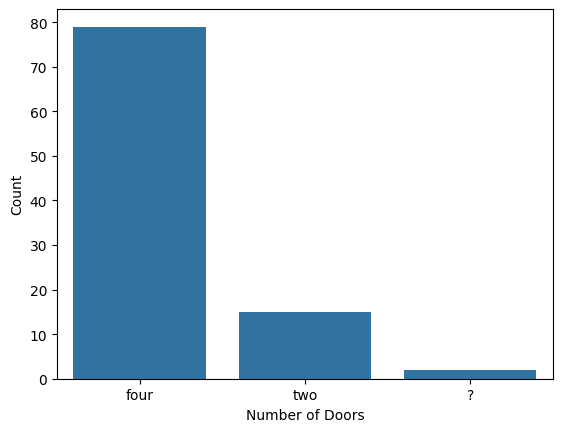

In [8]:
sedans = df[df['body_style'] == 'sedan']
num_doors_counts = sedans['num_doors'].value_counts()

sns.barplot(x=num_doors_counts.index, y=num_doors_counts.values)
plt.xlabel('Number of Doors')
plt.ylabel('Count')
plt.show()

Most sedans have 4 doors, replace missing values with 'four'

In [9]:
df['num_doors'] = df['num_doors'].replace('?', 'four').astype(str)

In [10]:
df['num_doors'].describe()

count      205
unique       2
top       four
freq       116
Name: num_doors, dtype: object

Look into norm-losses and price

count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: norm-losses, dtype: float64
----------------------------------------
count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64


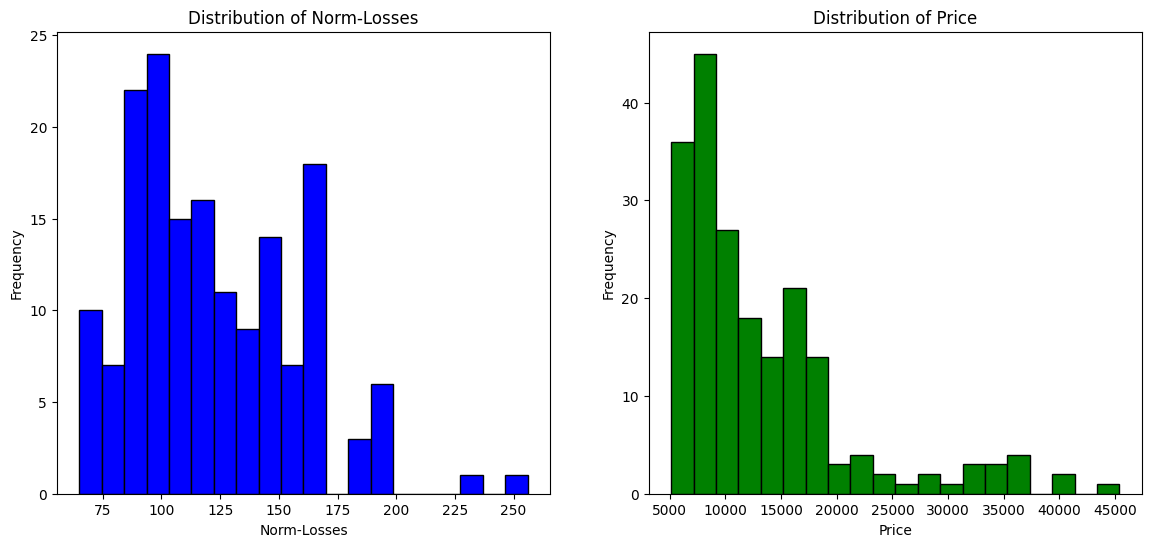

In [11]:
df['norm-losses'] = df['norm-losses'].replace('?', None).astype(float)
df['price'] = df['price'].replace('?', None).astype(float)

print(df['norm-losses'].describe())
print('-'*40)
print(df['price'].describe())

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].hist(df['norm-losses'], bins=20, color='blue', edgecolor='black')
axes[0].set_title('Distribution of Norm-Losses')
axes[0].set_xlabel('Norm-Losses')
axes[0].set_ylabel('Frequency')

axes[1].hist(df['price'], bins=20, color='green', edgecolor='black')
axes[1].set_title('Distribution of Price')
axes[1].set_xlabel('Price')
axes[1].set_ylabel('Frequency')

plt.show()

Based on these distributions, the missing values can be imputed with the median in both cases.

In [12]:
df['norm-losses'] = df['norm-losses'].fillna(df['norm-losses'].median())
df['price'] = df['price'].fillna(df['price'].median())

In [13]:
print(f'There are {df["norm-losses"].isnull().sum()} missing values in the norm-losses column.')
print(f'There are {df["price"].isnull().sum()} missing values in the price column.')

There are 0 missing values in the norm-losses column.
There are 0 missing values in the price column.


Look into bore and stroke. Every record containing missing values seems to contain the same engine (same make, body type, aspiration, peak_rpm...)

In [14]:
filtered_df = df[(df['make'] == 'mazda') & 
                 (df['fuel_type'] == 'gas') &
                 (df['aspiration'] == 'std') &
                 (df['body_style'] == 'hatchback')
]
            

print(filtered_df)

     norm-losses   make fuel_type aspiration num_doors body_style  \
5          150.0  mazda       gas        std       two  hatchback   
26         150.0  mazda       gas        std       two  hatchback   
52         115.0  mazda       gas        std      four  hatchback   
86         104.0  mazda       gas        std       two  hatchback   
106        129.0  mazda       gas        std       two  hatchback   
109        150.0  mazda       gas        std       two  hatchback   
130        104.0  mazda       gas        std       two  hatchback   
164        129.0  mazda       gas        std       two  hatchback   
168        104.0  mazda       gas        std       two  hatchback   
169        150.0  mazda       gas        std       two  hatchback   

    drive_wheels engine_location  wheel_base  length  ...  fuel_system  bore  \
5            rwd           front        95.3   169.0  ...         4bbl     ?   
26           rwd           front        95.3   169.0  ...         4bbl     ?   


The most similar mazda engine has a 3.39 bore and a 3.39 stroke. Replace missing values with these values.

In [15]:
df['bore'] = df['bore'].replace('?', None).astype(float).fillna(3.39)
df['stroke'] = df['stroke'].replace('?', None).astype(float).fillna(3.39)

In [16]:
print(f'There are {df["bore"].isnull().sum()} missing values in the bore column.')
print(f'There are {df["stroke"].isnull().sum()} missing values in the stroke column.')

There are 0 missing values in the bore column.
There are 0 missing values in the stroke column.


Check for similar engines like the records with the missing values for horsepower and peak_rpm.

In [17]:
filtered_df = df[(df['fuel_type'] == 'gas') &
                 (df['aspiration'] == 'std') &
                 (df['compression_ratio'] == 8.7) 
]

print(filtered_df)

     norm-losses     make fuel_type aspiration num_doors body_style  \
17          65.0   toyota       gas        std      four  hatchback   
40         115.0  renault       gas        std       two  hatchback   
62         115.0  renault       gas        std      four      wagon   
80          65.0   toyota       gas        std      four  hatchback   
99          83.0   subaru       gas        std       two  hatchback   
120         65.0   toyota       gas        std      four      sedan   
178         83.0   subaru       gas        std       two  hatchback   
200         65.0   toyota       gas        std      four      sedan   

    drive_wheels engine_location  wheel_base  length  ...  fuel_system  bore  \
17           fwd           front       102.4   175.6  ...         mpfi  3.31   
40           fwd           front        96.1   176.8  ...         mpfi  3.46   
62           fwd           front        96.1   181.5  ...         mpfi  3.46   
80           fwd           front       1

We can see that there is almost the same engine in a few other cars. The peak_rpm is mostly 4200, and the horsepower is 92 in the most cases. We will use these values for the missing values.

In [18]:
df['peak_rpm'] = df['peak_rpm'].replace('?', None).astype(float).fillna(4200).astype(int)
df['horsepower'] = df['horsepower'].replace('?', None).astype(float).fillna(92).astype(int)

In [19]:
print(f'There are {df["peak_rpm"].isnull().sum()} missing values in the peak_rpm column.')
print(f'There are {df["horsepower"].isnull().sum()} missing values in the horsepower column.')

There are 0 missing values in the peak_rpm column.
There are 0 missing values in the horsepower column.


### Class Distribution

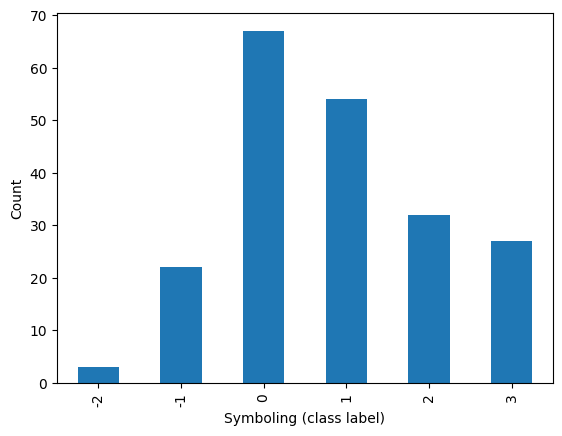

In [20]:
class_counts = df['symboling'].value_counts().sort_index()
class_counts.plot(kind='bar')
plt.xlabel('Symboling (class label)')
plt.ylabel('Count')
plt.show()

## 2. Data preprocessing

Use label encoding for the `make`, `engine_type`, `num_cylinders`, `fuel_system`, `body_style` columns.

In [21]:
def label_encode(df, col):
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])

In [22]:
label_encode(df, 'make')
label_encode(df, 'engine_type')
label_encode(df, 'num_cylinders')
label_encode(df, 'fuel_system')
label_encode(df, 'body_style')

In [23]:
print(df['make'].unique())
print(df['engine_type'].unique())
print(df['num_cylinders'].unique())
print(df['fuel_system'].unique())
print(df['body_style'].unique())

[19  8 11  4 12  7 13  3  2 20 14  6 10 18  1  5  9 16 17 21  0 15]
[3 6 5 2 4 0 1]
[2 6 3 5 1 0 4]
[1 5 2 3 6 0 7 4]
[3 2 1 4 0]


Use one-hot encoding for the `fuel_type`, `aspiration`, `num_doors`, `drive_wheels`, `engine_location` columns.


In [24]:
def one_hot_encode(df, col):
    one_hot = pd.get_dummies(df[col], prefix=col)
    one_hot_df = pd.concat([df, one_hot], axis=1)
    one_hot_df = one_hot_df.drop(col, axis=1)

    return one_hot_df

In [25]:
df = one_hot_encode(df, 'fuel_type')
df = one_hot_encode(df, 'aspiration')
df = one_hot_encode(df, 'num_doors')
df = one_hot_encode(df, 'drive_wheels')
df = one_hot_encode(df, 'engine_location')
df.head()

,norm-losses,make,body_style,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,...,fuel_type_gas,aspiration_std,aspiration_turbo,num_doors_four,num_doors_two,drive_wheels_4wd,drive_wheels_fwd,drive_wheels_rwd,engine_location_front,engine_location_rear
0,168.0,19,3,94.5,168.7,64.0,52.6,2169,3,2,...,True,True,False,False,True,False,False,True,True,False
1,113.0,8,3,93.1,166.8,64.2,54.1,1950,3,2,...,True,True,False,True,False,False,True,False,True,False
2,87.0,19,2,95.7,158.7,63.6,54.5,1985,3,2,...,True,True,False,False,True,False,True,False,True,False
3,125.0,11,3,96.3,172.4,65.4,51.6,2365,3,2,...,True,True,False,True,False,False,True,False,True,False
4,148.0,4,3,93.7,157.3,63.8,50.6,2191,3,2,...,True,False,True,True,False,False,True,False,True,False


Normalize columns with continous values:
- `norm-losses`
- `wheel_base`
- `length`
- `width`
- `height`
- `curb_weight`
- `engine_size`
- `bore`
- `stroke`
- `compression_ratio`
- `horsepower`
- `peak_rpm`
- `city_mpg`
- `highway_mpg`
- `price`

In [26]:
def normalize(df, cols: List[str]):
    normalizer = MinMaxScaler()
    for col in cols:
        df[col] = normalizer.fit_transform(df[[col]])

In [27]:
normalize(df, ['norm-losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price'])

In [28]:
df.head()

,norm-losses,make,body_style,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,...,fuel_type_gas,aspiration_std,aspiration_turbo,num_doors_four,num_doors_two,drive_wheels_4wd,drive_wheels_fwd,drive_wheels_rwd,engine_location_front,engine_location_rear
0,0.539267,19,3,0.230321,0.411940,0.308333,0.400000,0.264158,3,2,...,True,True,False,False,True,False,False,True,True,False
1,0.251309,8,3,0.189504,0.383582,0.325000,0.525000,0.179209,3,2,...,True,True,False,True,False,False,True,False,True,False
2,0.115183,19,2,0.265306,0.262687,0.275000,0.558333,0.192785,3,2,...,True,True,False,False,True,False,True,False,True,False
3,0.314136,11,3,0.282799,0.467164,0.425000,0.316667,0.340186,3,2,...,True,True,False,True,False,False,True,False,True,False
4,0.434555,4,3,0.206997,0.241791,0.291667,0.233333,0.272692,3,2,...,True,False,True,True,False,False,True,False,True,False


Split the data into train and test sets.

In [29]:
y = df['symboling']
X = df.drop('symboling', axis=1)

In [30]:
print(y.head())
print(X.head())

0    1
1    1
2    1
3    1
4    1
Name: symboling, dtype: int64
   norm-losses  make  body_style  wheel_base    length     width    height  \
0     0.539267    19           3    0.230321  0.411940  0.308333  0.400000   
1     0.251309     8           3    0.189504  0.383582  0.325000  0.525000   
2     0.115183    19           2    0.265306  0.262687  0.275000  0.558333   
3     0.314136    11           3    0.282799  0.467164  0.425000  0.316667   
4     0.434555     4           3    0.206997  0.241791  0.291667  0.233333   

   curb_weight  engine_type  num_cylinders  ...  fuel_type_gas  \
0     0.264158            3              2  ...           True   
1     0.179209            3              2  ...           True   
2     0.192785            3              2  ...           True   
3     0.340186            3              2  ...           True   
4     0.272692            3              2  ...           True   

   aspiration_std  aspiration_turbo  num_doors_four  num_doors_two  \

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
print(f'Rows in X_train: {X_train.shape[0]}\nRows in X_test: {X_test.shape[0]}')

Rows in X_train: 164
Rows in X_test: 41


## 3. Model training

### Random Forest Classifier

In [33]:
rf = RandomForestClassifier(n_estimators=100)

In [34]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
y_pred = rf.predict(X_test)

In [36]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted")}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted")}')
print(f'F1-Score: {f1_score(y_test, y_pred, average="weighted")}')

Accuracy: 0.7560975609756098
Precision: 0.8028455284552845
Recall: 0.7560975609756098
F1-Score: 0.7504154382203164


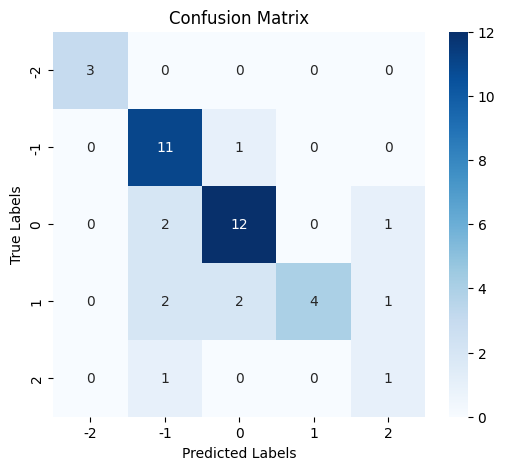

In [37]:
cm = confusion_matrix(y_test, y_pred)
labels = [-2, -1, 0, 1, 2]

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### K-Nearest Neighbors Classifier

In [38]:
knn = KNeighborsClassifier(n_neighbors=15)

In [39]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [40]:
y_pred = knn.predict(X_test)

In [ ]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted")}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted")}')
print(f'F1-Score: {f1_score(y_test, y_pred, average="weighted")}')

Accuracy: 0.4146341463414634
Precision: 0.4260475297060663
Recall: 0.4146341463414634
F1-Score: 0.40659340659340665


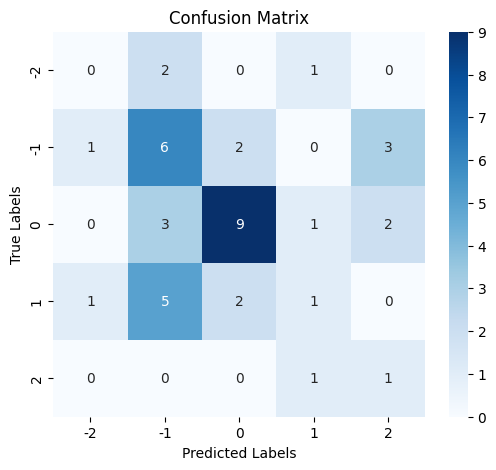

In [42]:
cm = confusion_matrix(y_test, y_pred)
labels = [-2, -1, 0, 1, 2]

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Neural Network (MLP Classifier)

In [49]:
mlp = MLPClassifier(max_iter=1000)
param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 100), (100, 50), (50, 100), (50, 50, 50), (100, 100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

In [51]:
search = GridSearchCV(mlp, param_grid, scoring='accuracy', n_jobs=-1)

In [52]:
search.fit(X_train, y_train)

/Users/tmskss/Development/automobile-classification-assignment/.venv/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/tmskss/Development/automobile-classification-assignment/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/tmskss/Development/automobile-classification-assignment/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/tmskss/Development/automobile-classification-assignment/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Sto

GridSearchCV(estimator=MLPClassifier(max_iter=1000), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(100,), (50, 50), (100, 100),
                                                (100, 50), (50, 100),
                                                (50, 50, 50), (100, 100, 100)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             scoring='accuracy')

In [54]:
print(f'Best params: {search.best_params_}')
mlp = search.best_estimator_

Best params: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'solver': 'adam'}


In [55]:
y_pred = mlp.predict(X_test)

In [56]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted")}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted")}')
print(f'F1-Score: {f1_score(y_test, y_pred, average="weighted")}')

Accuracy: 0.6341463414634146
Precision: 0.6499999999999999
Recall: 0.6341463414634146
F1-Score: 0.6258663969128171


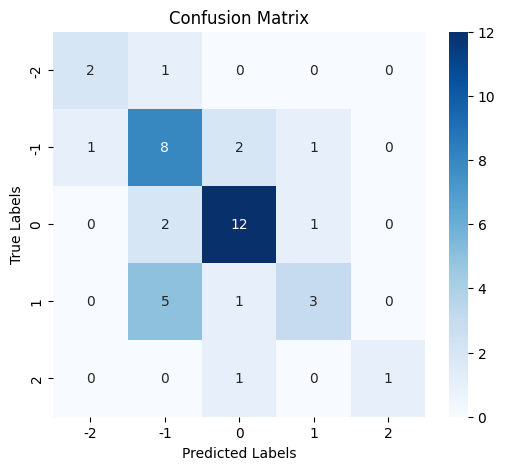

In [57]:
cm = confusion_matrix(y_test, y_pred)
labels = [-2, -1, 0, 1, 2]

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()